

**Overview**

   *Particle identification (PID)is the process of using information left by a particle 
passing through a particle detector to identify which type it is. 
Photons and Electrons are an example of particle.
PID reduces backgrounds and improves measurement 
resolutions, and is essential to many analyses at particle detectors.
In this Analysis we are going to use the dataset "Pid-5M- from kaggle 
which is containing several particles, study the correlation between the articles, with some interesting plots, 
also we are going to prepare the 
data for Machine Learning (ML) classification by comparing three ML algorithms
which are K-Nearest Neighbor (KNN), Multilayer Perception 
and Support Vector Machine (SVM).*




**Data**

*The data contains four particle types - positron (-11), pion (211), kaon (321), and proton (2212); six detector responses. Some detector responses are zero due to detector inefficiencies or incomplete geometric coverage of the detector.*

Source:
https://www.kaggle.com/naharrison/particle-identification-from-detector-responses


In [3]:
# Let's have a look into the Data
# Pandas is a Python library allows to read, write and manage CSV formats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
df = pd.read_csv('pid-5M.csv')


In [4]:
df.head()

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256


In [5]:
print("the number of rows in pid dataset is ",df.shape[0])
print("the number of columns in pid dataset is ",df.shape[1])

the number of rows in pid dataset is  5000000
the number of columns in pid dataset is  7


*The source of the data says that the id column identifies the type of particle*
* (-11) -> positron 
* (211) -> pion 
* (321) -> kaon
* (2212) -> proton 

*Particle's parameters taken from the responses of six detectors, momentum (p), angle (theta), velocity (beta), number of photoelectrons (nphe), incoming and outgoing energies (ein, eout) Note that some energies are set to 0 due to inefficiencies or incomplete incomplete geometric coverage of the detector.*

In [6]:
df.id.value_counts()

 211     2806833
 2212    1945849
 321      232471
-11        14847
Name: id, dtype: int64

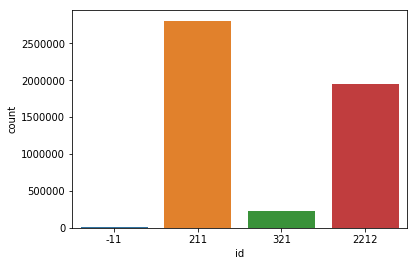

In [7]:
sns.countplot(x='id', data=df)

*Data Statistic*

In [7]:
df.describe()

,id,p,theta,beta,nphe,ein,eout
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,9.941839e+02,1.230053e+00,4.889321e-01,8.995796e-01,3.575243e+00,5.635883e-02,7.033195e-02
std,9.724034e+02,7.414895e-01,2.942161e-01,1.132321e-01,1.779236e+01,7.882675e-02,1.020604e-01
min,-1.100000e+01,2.101170e-01,9.222140e-02,5.500010e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.110000e+02,6.657510e-01,2.817420e-01,8.378760e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.110000e+02,1.066150e+00,4.048670e-01,9.461940e-01,0.000000e+00,3.442440e-02,4.417490e-02
75%,2.212000e+03,1.649650e+00,6.117800e-01,9.855910e-01,0.000000e+00,6.834520e-02,9.365990e-02
max,2.212000e+03,5.286950e+00,2.219270e+00,1.499590e+00,3.490000e+02,8.993820e-01,1.097410e+00


Data Correlation

 *correlation is study the dependencies between variables, whether causal or not.
 In our case we want to know what particle is highly dependent on the other.*

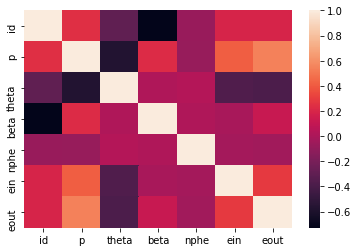

In [8]:
corr = df.corr()
sns.heatmap(corr)

In [9]:
# Data preparation for the scatter plot
# Reduce the size


#df = df[0:100000]
#Type of particle : (211) -> pion 
particle_pion = df[df.id == abs(211)]
#Type of particle : (322) -> kaon 
particle_kaon = df[df.id == abs(321)]
#Type of particle : (2212) -> proton 
particle_proton = df[df.id == abs(2212)]
#Type of particle : (-11) -> positron 

particle_positron = df[df.id == -11]


particle_positron


,id,p,theta,beta,nphe,ein,eout
143,-11,0.965438,0.175186,0.999518,16,0.226139,0.000000
279,-11,1.430840,0.266338,1.000610,53,0.260426,0.056901
1374,-11,0.315557,0.222151,0.997282,0,0.000000,0.000000
1916,-11,0.885481,0.782970,1.001940,0,0.000000,0.000000
1964,-11,0.698711,0.329893,0.996576,39,0.120439,0.000000
...,...,...,...,...,...,...,...
4997949,-11,0.584726,0.358718,0.990728,7,0.108812,0.039872
4998103,-11,1.382620,0.234930,0.980864,39,0.199039,0.093111
4998682,-11,0.228122,0.579169,0.968950,0,0.000000,0.000000
4999010,-11,0.937667,0.161788,0.983267,0,0.138293,0.064775


In [10]:
print('the number of rows in particle_pion is  ',particle_pion.shape[0])
print('the number of rows in particle_kaon is  ',particle_kaon.shape[0])
print('the number of rows in particle_proton is  ',particle_proton.shape[0])
print('the number of rows in particle_positron is  ',particle_positron.shape[0])

the number of rows in particle_pion is   2806833
the number of rows in particle_kaon is   232471
the number of rows in particle_proton is   1945849
the number of rows in particle_positron is   14847


**Scatter Plot**

We use Scatter plot/Scatter graph typically to display values for two variables for a set of data.

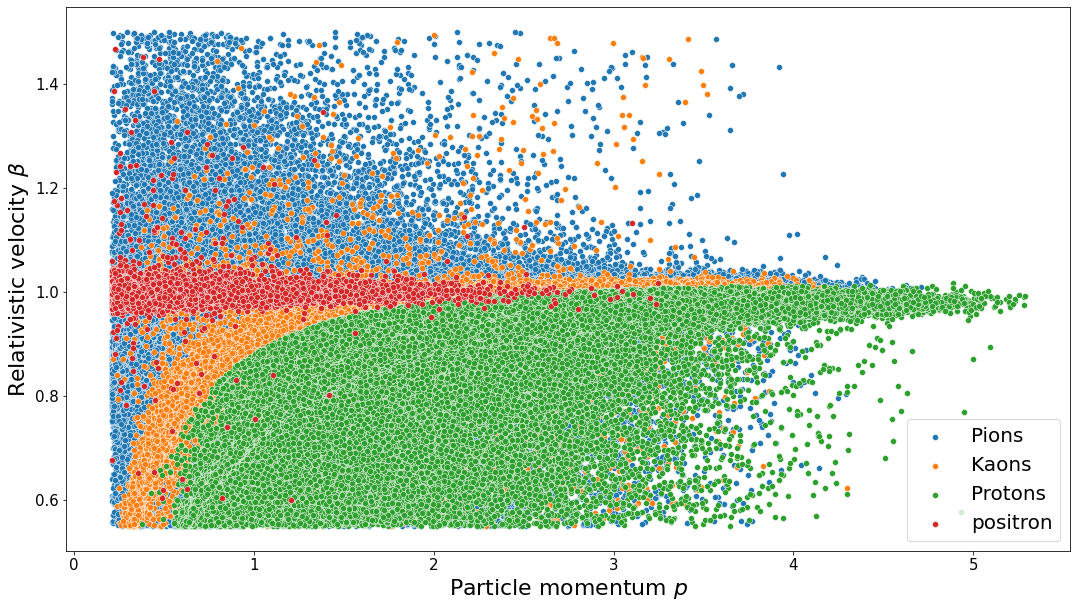

In [11]:
fig, ax1 = plt.subplots(figsize=(18,10))
sns.scatterplot(x=particle_pion.p, y=particle_pion.beta , data=df, ax = ax1, label = "Pions");
sns.scatterplot(x=particle_kaon.p, y=particle_kaon.beta , data=df, ax = ax1, label = "Kaons");
sns.scatterplot(x=particle_proton.p, y=particle_proton.beta , data=df, ax = ax1, label = "Protons");
sns.scatterplot(x=particle_positron .p, y=particle_positron .beta , data=df, ax = ax1, label = "positron");
ax1.set_xlabel(r'Particle momentum $p$',fontsize=22)
ax1.set_ylabel(r'Relativistic velocity $\beta$', fontsize=22)
ax1.tick_params(axis='both', which='major', labelsize=15)

plt.legend(loc="lower right", fontsize=20)

plt.show()

In [8]:
#Data Preparation for the ML
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
data = df[0:100000]
X = data.drop(columns=['id'],axis = 1)
y = data.id
# training and validation sets
#We are splitting our particles into a test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)
X_train

,p,theta,beta,nphe,ein,eout
10382,0.392920,1.100780,0.947609,0,0.000000,0.000000
73171,0.699016,0.828772,0.594142,0,0.000000,0.000000
30938,0.345006,1.334670,0.946776,0,0.000000,0.000000
99310,1.415730,0.279600,0.829132,0,0.086061,0.551797
58959,0.542153,0.711174,0.991014,0,0.000000,0.000000
...,...,...,...,...,...,...
21243,0.528572,0.880125,0.969362,0,0.000000,0.000000
45891,0.797894,0.397842,0.642888,0,0.136507,0.000000
42613,1.054090,0.558271,1.000380,0,0.023529,0.209201
43567,0.645304,0.423061,0.561754,0,0.063676,0.000000


**Classification**

1. K-Nearest Neighbor
*The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these.*


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, recall_score, precision_score, f1_score
model_KNN  = KNeighborsClassifier(n_neighbors=2,  algorithm='ball_tree')
model_KNN.fit(X_train, y_train)
model_KNN.predict(X_test)
y_pred  = model_KNN.predict(X_test)


accuracy   = accuracy_score(y_test, y_pred)
print("***Accuracy: " ,accuracy)

***Accuracy:  0.9317


In [10]:
knn_recall = recall_score(y_test, y_pred, average='micro')
knn_recall

0.9317

In [11]:
knn_precision = precision_score(y_test, y_pred, average='micro')
knn_precision

0.9317

In [12]:
knn_f1_score = f1_score(y_test, y_pred, average='micro')
knn_f1_score

0.9317

In [13]:
knn_report = classification_report(y_test, y_pred)
print(knn_report)

              precision    recall  f1-score   support

         -11       0.36      0.48      0.41        67
         211       0.93      0.97      0.95     11274
         321       0.62      0.42      0.50       964
        2212       0.98      0.94      0.96      7695

    accuracy                           0.93     20000
   macro avg       0.72      0.70      0.70     20000
weighted avg       0.93      0.93      0.93     20000



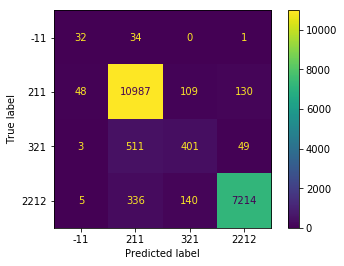

In [14]:
plot_confusion_matrix(model_KNN, X_test, y_test) 
plt.show()

2. MultiLayer Perception 

*A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN), it consists of at least three layers of nodes: an input layer, a hidden layer and an output layer.* 

In [15]:
from sklearn.neural_network import MLPClassifier
model_MLP = MLPClassifier(alpha=1, max_iter=120)
model_MLP.fit(X_train, y_train)
model_MLP.predict(X_test)
pred_MLP = model_MLP.predict(X_test)
accuracy  = accuracy_score(y_test, pred_MLP)

print("***Accuracy: " ,accuracy)


***Accuracy:  0.9337


In [16]:
MLP_recall = recall_score(y_test, pred_MLP, average='micro')
MLP_recall

0.9337

In [17]:
MLP_precision = precision_score(y_test, pred_MLP, average='micro')
MLP_precision

0.9337

In [18]:
MLP_f1_score = f1_score(y_test, pred_MLP, average='micro')
MLP_f1_score

0.9337

In [24]:
MLP_report = classification_report(y_test, pred_MLP)
print(MLP_report)

              precision    recall  f1-score   support

         -11       0.00      0.00      0.00        67
         211       0.93      0.98      0.95     11274
         321       0.00      0.00      0.00       964
        2212       0.93      0.99      0.96      7695

    accuracy                           0.93     20000
   macro avg       0.47      0.49      0.48     20000
weighted avg       0.89      0.93      0.91     20000




C:\Users\walsa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\walsa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\walsa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


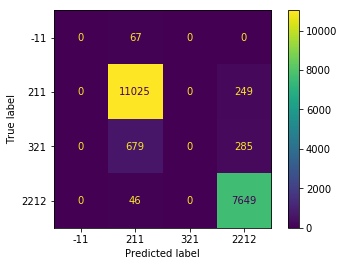

In [25]:
plot_confusion_matrix(model_MLP, X_test, y_test) 
plt.show()

3.  SVM 

*Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.*

*The advantages of support vector machines are:*

* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

Ref : https://scikit-learn.org/stable/modules/svm.html

In [26]:
from sklearn.svm import SVC
model = SVC(kernel="linear", C=0.025)
model.fit(X_train, y_train)
model.predict(X_test)
y_pred = model.predict(X_test)
accuracy  = accuracy_score(y_test, y_pred)


print("***Accuracy: " ,accuracy)


***Accuracy:  0.92045


In [27]:
SVM_recall = recall_score(y_test, y_pred, average='micro')
SVM_recall

0.92045

In [28]:
SVM_precision = precision_score(y_test, y_pred, average='micro')
SVM_precision

0.92045

In [29]:
SVM_f1_score = f1_score(y_test, y_pred, average='micro')
SVM_f1_score

0.92045

In [30]:
SVM_report = classification_report(y_test, y_pred)
print(SVM_report)

              precision    recall  f1-score   support

         -11       0.00      0.00      0.00        67
         211       0.94      0.95      0.95     11274
         321       0.00      0.00      0.00       964
        2212       0.89      1.00      0.94      7695

    accuracy                           0.92     20000
   macro avg       0.46      0.49      0.47     20000
weighted avg       0.87      0.92      0.90     20000



C:\Users\walsa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\walsa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\walsa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


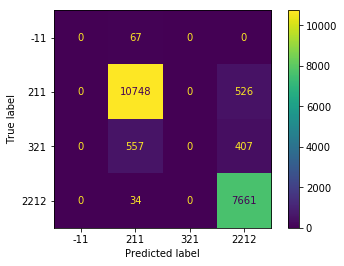

In [31]:
plot_confusion_matrix(model, X_test, y_test) 
plt.show()

**Conclusion**

Our 3 classifiers presented an accuracy above 93% which is pretty good, however, the Support Vector Classifier took longer time during the training.